## Entity Extraction from Contract Documents

Problem Statement:


Many companies deal with the understanding of large amount text data in the documents. With the help of natural language processing one can break the down problem in to simple steps as shown below.

Display: Jupyter notebook

Language used: Python

Libraries used: nltk, re

Tasks accomplished:

1) Extracting addresses which are in various format from the given document

2) Tokenizing the text into sentences, words and then tagging with Name Entities. The process performed here is shown in the Figure 1

Note: This project is purely for the demonstration purpose and not to disclose any confidential data/procedures of any originazation


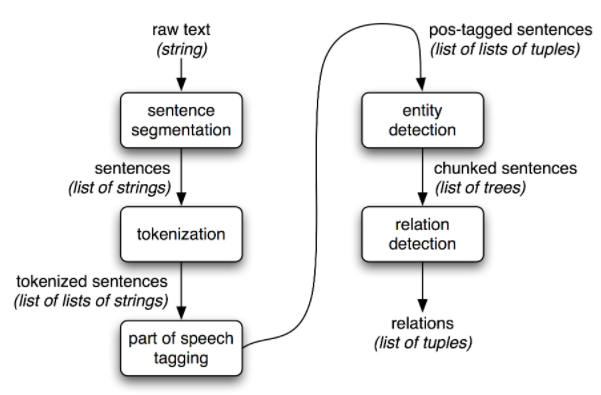

In [49]:
from IPython.display import Image
Image(filename='entity_extraction_process.png')
# Note: this image is taken from NLTK Book and requires citation

#### Figure 1: Entity Extraction Process

### Analysis

In [50]:
# Importing NLTK Dependencies
import nltk, re
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tokenize.punkt import PunktSentenceTokenizer


#### Loading the data

In [51]:
# using docx2txt libarary to avoid the encoding errors while reading the text in given word file
import docx2txt
raw_data = docx2txt.process('Contract_Template.docx')

#### Converting the rawtext into sentences

In [112]:
paragraphs = [p for p in raw_data.split('\n') if p]
tokenizer = PunktSentenceTokenizer()
sentences = [tokenizer.tokenize(paragraph) for paragraph in paragraphs]
sentences[:5]

[['Have Fun Enterprises'],
 ['Subsidory of Pesusich Co'],
 ['Burlington Textiles Corp of America'],
 ['Address:'],
 ['BroomfieldUSA80319CO1234 Main St Suite #400']]

#### Task 1: To extract the addresses which are in different format in the given text

In [137]:
# using python's regular expressions to extract the required address data
street_address   = re.compile(u'\d{1,4} [\w\s]{1,20}(?:street|st|avenue|ave|road|rd|highway|hwy|square|sq|trail|trl|drive|dr|court|ct|park|parkway|pkwy|circle|cir|boulevard|blvd)\W?(?=\D|$)', re.IGNORECASE)
zip_code = re.compile(r'\b\d{5}(?:[-\s]\d{4})?\b')
proper_address = "[0-9]{1,5} .+, .+, [A-Z]{2} [0-9]{5}"


print ("Below are the street addresses found in the given document \n")
print (re.findall(street_address, raw_data))

print ("\nBelow are the zip codes found in the given document \n")
print (re.findall(zip_code, raw_data))

print ("\nBelow is the address found in the given document with PROPER format \n")
print (re.findall(proper_address, raw_data))
for i in range (len(sentences)):
    if sentences[i][0] == 'Address:':
        print ("\nBelow is the address found in the given document with IMPROPER format is: \n")
        print (sentences[i+1][0])


Below are the street addresses found in the given document 

['1234 Main St ', '390 Interlocken Blvd\n', '1895 Preston White Drive,']

Below are the zip codes found in the given document 

['80021', '20191']

Below is the address found in the given document with PROPER format 

['1895 Preston White Drive, Reston, VA 20191']

Below is the address found in the given document with IMPROPER format is: 

BroomfieldUSA80319CO1234 Main St Suite #400


### Task 2: Entity Extraction

#### Tokenizing Words

In [131]:
tokens = [nltk.word_tokenize(sent[0]) for sent in sentences] 
tokens[:6]         # View the first few tokens

[['Have', 'Fun', 'Enterprises'],
 ['Subsidory', 'of', 'Pesusich', 'Co'],
 ['Burlington', 'Textiles', 'Corp', 'of', 'America'],
 ['Address', ':'],
 ['BroomfieldUSA80319CO1234', 'Main', 'St', 'Suite', '#', '400'],
 ['390', 'Interlocken', 'Blvd']]

In [132]:
tokens[0]

['Have', 'Fun', 'Enterprises']

#### Entity Extraction 

Parts of Speech Tagging

In [133]:
# Viewing the parts of speech tag for each token in the given text
pos_tags =  [nltk.pos_tag(token) for token_list in tokens for token in token_list] 
pos[:20]        # View top few pos tags

[('Have', 'NNP'),
 ('Fun', 'NNP'),
 ('Enterprises', 'NNP'),
 ('Subsidory', 'NNP'),
 ('of', 'IN'),
 ('Pesusich', 'NNP'),
 ('Co', 'NNP'),
 ('Burlington', 'NNP'),
 ('Textiles', 'NNP'),
 ('Corp', 'NNP'),
 ('of', 'IN'),
 ('America', 'NNP'),
 ('Address', 'NNP'),
 (':', ':'),
 ('BroomfieldUSA80319CO1234', 'NNP'),
 ('Main', 'NNP'),
 ('St', 'NNP'),
 ('Suite', 'NNP'),
 ('#', '#'),
 ('400', 'CD')]

NNP - Noun Proper Plural tag with respec to NLP library. The below command provides description of each POS tag followed by the nltk library

In [138]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

#### Name Entity Chunks

The below command assigns name entity to each token in the given document. The commonly used type of named entities are
ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, PERCENT, FACILITY, GPE

In [139]:
chunks = ne_chunk(pos)
print (chunks.__repr__())

Tree('S', [Tree('PERSON', [('Have', 'NNP')]), Tree('ORGANIZATION', [('Fun', 'NNP'), ('Enterprises', 'NNP')]), ('Subsidory', 'NNP'), ('of', 'IN'), Tree('PERSON', [('Pesusich', 'NNP'), ('Co', 'NNP'), ('Burlington', 'NNP'), ('Textiles', 'NNP'), ('Corp', 'NNP')]), ('of', 'IN'), Tree('GPE', [('America', 'NNP')]), ('Address', 'NNP'), (':', ':'), Tree('ORGANIZATION', [('BroomfieldUSA80319CO1234', 'NNP'), ('Main', 'NNP'), ('St', 'NNP'), ('Suite', 'NNP')]), ('#', '#'), ('400', 'CD'), ('390', 'CD'), Tree('ORGANIZATION', [('Interlocken', 'NNP'), ('Blvd', 'NNP')]), ('Suite', 'NNP'), ('300', 'CD'), Tree('GPE', [('Broomfield', 'NNP')]), (',', ','), ('CO', 'NNP'), ('80021', 'CD'), ('Contract', 'NNP'), ('Start', 'NNP'), ('Date', 'NNP'), (':', ':'), ('09/02/2017', 'CD'), ('This', 'DT'), ('is', 'VBZ'), ('my', 'PRP$'), ('really', 'RB'), ('long', 'JJ'), ('text', 'NN'), ('that', 'WDT'), ('should', 'MD'), ('appear', 'VB'), ('around', 'IN'), ('the', 'DT'), ('description', 'NN'), ('.', '.'), ('You', 'PRP'), (